## Observations and Insights 

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np  #todo is this needed?

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path) 
study_results = pd.read_csv(study_results_path)
#study_results["Mouse ID"].nunique()

In [3]:
# Combine the data into a single dataset
mousestud_df=pd.merge(mouse_metadata,study_results, on ="Mouse ID")
# Display the data table for preview
mousestud_df  #["Mouse ID"].nunique()   249 mouse ids after merge.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
print("Number of mice in study: "+str(mouse_metadata["Mouse ID"].nunique()))


Number of mice in study: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#1893 rows, 249 mice look for duplidate
gb=pd.DataFrame(mousestud_df.groupby(["Mouse ID","Timepoint"]).size().rename('count'))

print(gb.loc[gb["count"]>1]) #mouse g989 has duplicate time points

                    count
Mouse ID Timepoint       
g989     0              2
         5              2
         10             2
         15             2
         20             2


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupDataMouse_df=mousestud_df.loc[mousestud_df["Mouse ID"]=='g989']
dupDataMouse_df #13 rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
mousestud_df.shape  # before has 1893 rows

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseStudCl_df=mousestud_df.loc[mousestud_df["Mouse ID"]!='g989']

mouseStudCl_df.shape  #1880 rows as expected

(1880, 8)

In [8]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice in clean df: "+str(mouseStudCl_df["Mouse ID"].nunique()))

Number of mice in clean df: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouseStudCl_df["Drug Regimen"].unique()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_gb=mouseStudCl_df.groupby("Drug Regimen")
tv_mean = drug_gb["Tumor Volume (mm3)"].mean()
tv_median = drug_gb["Tumor Volume (mm3)"].median()
tv_var = drug_gb["Tumor Volume (mm3)"].var()
tv_std = drug_gb["Tumor Volume (mm3)"].std()
#[[drug[0],st.sem(drug[1])] for drug in drug_gb["Tumor Volume (mm3)"]]  returned drug-sem list pairs to triple check it's the same order as rest of returns
tv_sem = [st.sem(drug[1]) for drug in drug_gb["Tumor Volume (mm3)"]]

# Assemble the resulting series into a single summary dataframe.

#below doesn't work
#summStats_df=pd.concat(pd.DataFrame(tv_mean.rename("Mean")), pd.DataFrame(tv_median.rename("Median")))#, tv_var, tv_std, tv_sem)

summStats_df=pd.DataFrame(tv_mean.rename("Mean"))
summStats_df["Median"]=tv_median
summStats_df["Variance"]=tv_var
summStats_df["Standard_Deviation"]=tv_std
summStats_df["SEM"]=tv_sem  
summStats_df

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
[[drug[0],st.sem(drug[1])] for drug in drug_gb["Tumor Volume (mm3)"]]

aggSummStats = mouseStudCl_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(["mean","median","var","std","sem"])
aggSummStats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

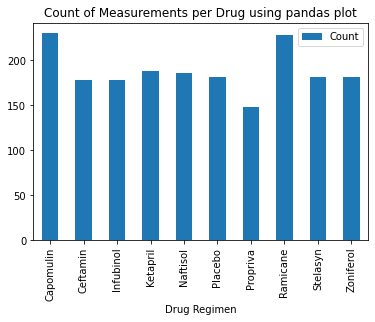

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugCounts=drug_gb["Mouse ID"].count().rename("Count").to_frame()
pandaPlot=drugCounts.plot(kind="bar",title="Count of Measurements per Drug using pandas plot")
#pandaPlot.title="fuck"
pandaPlot.xlabel = "Drug"


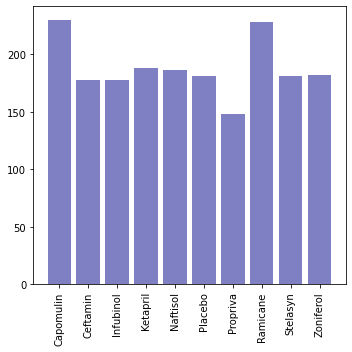

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=np.arange(len(drugCounts.index))

labels=drugCounts.index
plt.figure(figsize=(5,5))
plt.bar(x_axis, drugCounts.Count,color='darkblue', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation="vertical")

plt.title = "Count of Measurements per Drug using pyplot"
plt.xlabel="Drug"
plt.ylabel="# of Measurements taken"

plt.tight_layout()  
plt.show()

(-1.1031843716069307,
 1.1001516367431872,
 -1.103492681505578,
 1.1018390827045563)

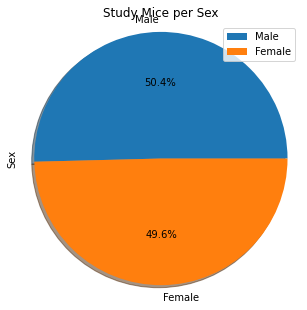

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# remove the mouse that was left out of dataset due to duplicate study data
mouse_df = mouse_metadata[["Mouse ID","Sex"]].loc[mouse_metadata["Mouse ID"]!='g989']
mouse_df = mouse_df["Sex"].value_counts().to_frame()
plotMouseSex = mouse_df.plot(kind="pie",y="Sex",title = "Study Mice per Sex", shadow=True,autopct="%1.1f%%",figsize=(5,5))
plotMouseSex.axis("equal")




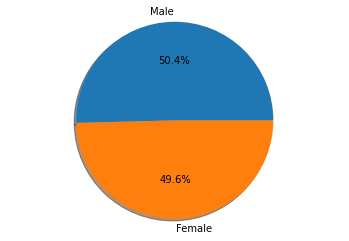

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#eldata_df["Candidate"].value_counts(ascending=False)
#mouseGB=mouseStudCl_df[["Mouse ID","Sex"]].groupby(["Sex","Mouse ID"]).count().reset_index() #.to_frame()
#len(mouseGB.loc[mouseGB.Sex=="Female"])
#countBy = pd.DataFrame(drug_gb["Mouse ID"].count().rename("Count"))
#print(type(countPerDrug))

pies=mouse_df.index
pieCount=mouse_df.Sex
plt.pie(pieCount, labels=pies, shadow=True, autopct="%1.1f%%")
plt.title = "Study Mice per Sex using plt.plot"
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
